# Packages

In [ ]:
import god.core as core
import god.funcs as funcs
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
from PIL import ImageOps, Image

# Coding Zone

In [ ]:
target_dir = r"D:\LYU\nsf\fang_qiu_group\TestData\ds02"
fp = os.path.join(target_dir, "test.json")
# load data from a json file, and then save it to be a dictionary
ret_coco = funcs.lht_load_json(fp)

In [ ]:
ret_coco.keys()

dict_keys(['images', 'annotations', 'categories', 'results'])

In [ ]:
ret_coco['images'][0].keys()

dict_keys(['file_name', 'height', 'width', 'id'])

In [ ]:
ret_coco['annotations'][0].keys()

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id', 'ignore'])

In [ ]:
ret_coco['results'][0].keys()

dict_keys(['bbox', 'category_id', 'result', 'image_id'])

## the ret_coco dictionary hierachy information.  

- images  
    - `id ` 
    - `file_name`  
    - `height`  
    - `width ` 

- annotations  
    - `bbox: a list where store original recotangles`
    - `category_id: 1 animal; 0 no animal`
    - `image_id: correspoinding with a image's id`  

- categories
    - `bbox: a list where save the classification results`  
    - `category_id: 1 animal; 0 no animal`  
    - `image_id: correspoinding with a image's id `


# A Simple Example

11
1
number of IOA: 12


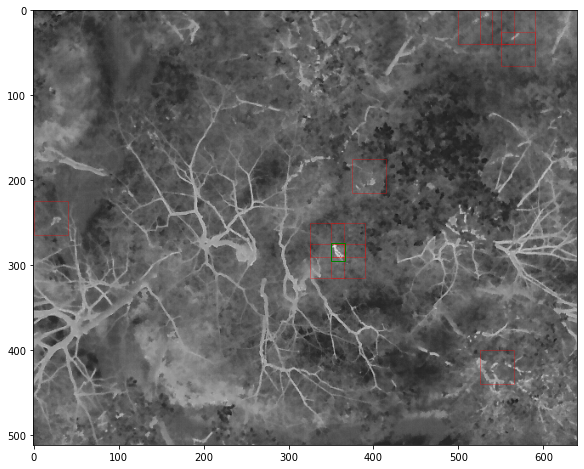

In [ ]:
images = ret_coco['images']
results = ret_coco['results']
annotations = ret_coco['annotations']
#
img_fn = images[10]['file_name']
img_id = images[10]['id']

# get the classification results
bb = filter(lambda i: i['image_id'] == img_id, results)
bbox_animal = filter(lambda x: x['category_id'] == 1, bb)
bbox_animal = list(bbox_animal)
print(len(bbox_animal))

# get the original label informaton of recotangles
ann = filter(lambda i: i['image_id'] == img_id, annotations)
ann = list(ann)
print(len(ann))

p = os.path.join(target_dir,img_fn)
img = Image.open(p)
img = np.asarray(img)
#


rects = []
for i in bbox_animal:
    x,y,w,h = i['bbox']
    rect = patches.Rectangle((x,y),w,h,linewidth=1, edgecolor='r', facecolor='none', alpha=0.3)
    rects.append(rect)
#
for i in ann:
    x,y,w,h = i['bbox']
    rect = patches.Rectangle((x,y),w,h,linewidth=1, edgecolor='g', facecolor='none')
    rects.append(rect)
#
print(f'number of IOA: {len(rects)}')
#
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.imshow(img)
for rect in rects:
    ax.add_patch(rect)
plt.show()

# Your Task  
> design a algorithm to obtain the intersection of red rectangles.

In [ ]:
def findIntersectionsOfRects(bbox_animal):
    '''
    Parameters:
        bbox_animal: a list where save rectangles like [x,y,height, width]
    Return:
        return a list where save the intersections like [x,y,height, width]
    '''
    pass
    